In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

In [2]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv("/Users/Joshitha/Downloads/energydata_complete.csv")

In [4]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
data.shape

(19735, 29)

In [6]:
data.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
sns.distplot(data["appliances"])

KeyError: 'appliances'

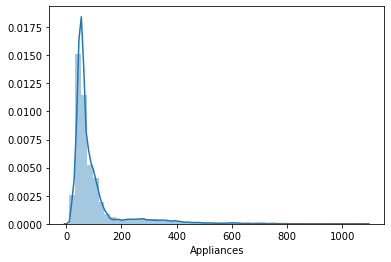

In [9]:
sns.distplot(data["Appliances"])

In [10]:
data = data[data['Appliances'].between(data['Appliances'].quantile(.0), data['appliances'].quantile(.99))]
sns.boxplot(data["Appliances"],color="red")

KeyError: 'appliances'

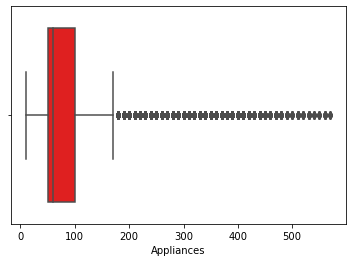

In [11]:
data = data[data['Appliances'].between(data['Appliances'].quantile(.0), data['Appliances'].quantile(.99))]
sns.boxplot(data["Appliances"],color="red")

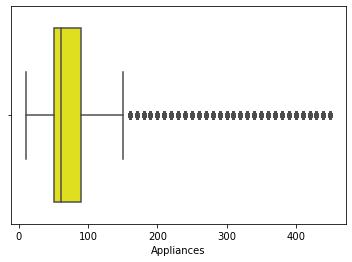

In [12]:
data = data[data['Appliances'].between(data['Appliances'].quantile(.0), data['Appliances'].quantile(.99))]
sns.boxplot(data["Appliances"],color="yellow")

In [13]:
import time
import dateutil
import sklearn.metrics as sm
data["exact_date"]=data['date'].str.split(' ').str[0]

data["hours"]=(data['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
data["seconds"]=((data['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)

data["week"]=(data['date'].str.split(' ').str[0])
data["week"]=(data['week'].apply(dateutil.parser.parse, dayfirst=True))
data["weekday"]=(data['week'].dt.dayofweek).astype(str).astype(int)
data["week"]=(data['week'].dt.day_name())

data['log_appliances'] = np.log(data.Appliances)
data['hour*lights'] = data.hours * data.lights
data['hour_avg'] = list(map(dict(data.groupby('hours')["Appliances"].mean()).get, data.hours))

data.head(5)
date	appliances	lights	t1	rh_1	t2	rh_2	t3	rh_3	t4	...	rv1	rv2	exact_date	hours	seconds	week	weekday	

SyntaxError: invalid syntax (<ipython-input-13-979c65764a55>, line 19)

In [14]:
import time
import dateutil
import sklearn.metrics as sm
data["exact_date"]=data['date'].str.split(' ').str[0]

data["hours"]=(data['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
data["seconds"]=((data['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)

data["week"]=(data['date'].str.split(' ').str[0])
data["week"]=(data['week'].apply(dateutil.parser.parse, dayfirst=True))
data["weekday"]=(data['week'].dt.dayofweek.astype(str).astype(int))
data["week"]=(data['week'].dt.day_name())

data['log_appliances'] = np.log(data.Appliances)
data['hour*lights'] = data.hours * data.lights
data['hour_avg'] = list(map(dict(data.groupby('hours')["Appliances"].mean()).get, data.hours))

data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv1,rv2,exact_date,hours,seconds,week,weekday,log_appliances,hour*lights,hour_avg
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,13.275433,2016-01-11,17,0,Tuesday,1,4.094345,510,130.72445
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,18.606195,2016-01-11,17,600,Tuesday,1,4.094345,510,130.72445
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,28.642668,2016-01-11,17,1200,Tuesday,1,3.912023,510,130.72445
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,45.410389,2016-01-11,17,1800,Tuesday,1,3.912023,680,130.72445
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,10.084097,2016-01-11,17,2400,Tuesday,1,4.094345,680,130.72445


In [15]:
dates=data["exact_date"].unique()
arranged_day = pd.Categorical(data["exact_date"], categories=dates,ordered=True)
date_series = pd.Series(arranged_day)
table = pd.pivot_table(data,values="appliances",index=date_series, aggfunc=[np.sum],fill_value=0)
table.plot(kind="bar",figsize=(20, 7))
plt.show()

KeyError: 'appliances'

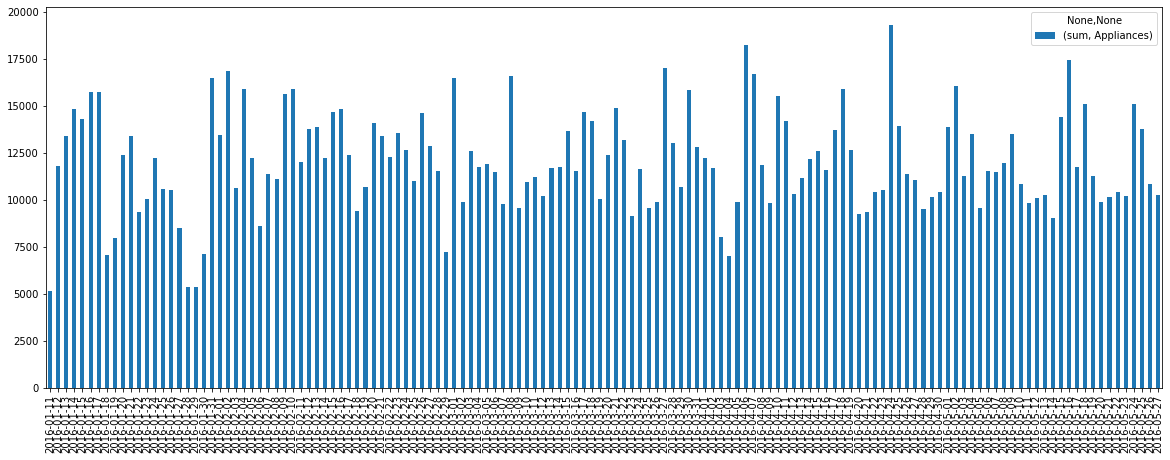

In [16]:
dates=data["exact_date"].unique()
arranged_day = pd.Categorical(data["exact_date"], categories=dates,ordered=True)
date_series = pd.Series(arranged_day)
table = pd.pivot_table(data,values="Appliances",index=date_series, aggfunc=[np.sum],fill_value=0)
table.plot(kind="bar",figsize=(20, 7))
plt.show()

In [17]:
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
arranged_day = pd.Categorical(data["week"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(data,index=["hours"],
               values="appliances",columns=day_series,
               aggfunc=[np.sum],fill_value=0)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Heatmap : Appliances(wh)')

heatmap = ax.pcolor(table)

ax.set_xlabel("Week Days")
ax.set_ylabel("Hours")

plt.colorbar(heatmap)
ax.set_yticks(range(len(table.index)+1))
ax.set_xticks(range(len(table.columns)+1))

plt.xlabel("Week")
plt.ylabel("Hours of Day")
plt.show()

KeyError: 'appliances'

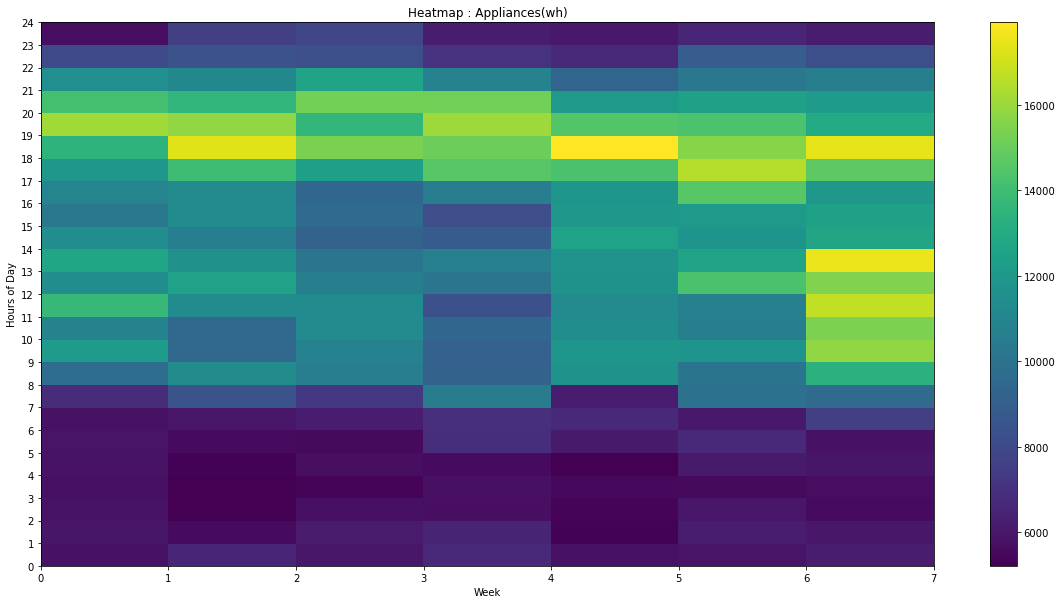

In [18]:
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
arranged_day = pd.Categorical(data["week"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(data,index=["hours"],
               values="Appliances",columns=day_series,
               aggfunc=[np.sum],fill_value=0)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Heatmap : Appliances(wh)')

heatmap = ax.pcolor(table)

ax.set_xlabel("Week Days")
ax.set_ylabel("Hours")

plt.colorbar(heatmap)
ax.set_yticks(range(len(table.index)+1))
ax.set_xticks(range(len(table.columns)+1))

plt.xlabel("Week")
plt.ylabel("Hours of Day")
plt.show()

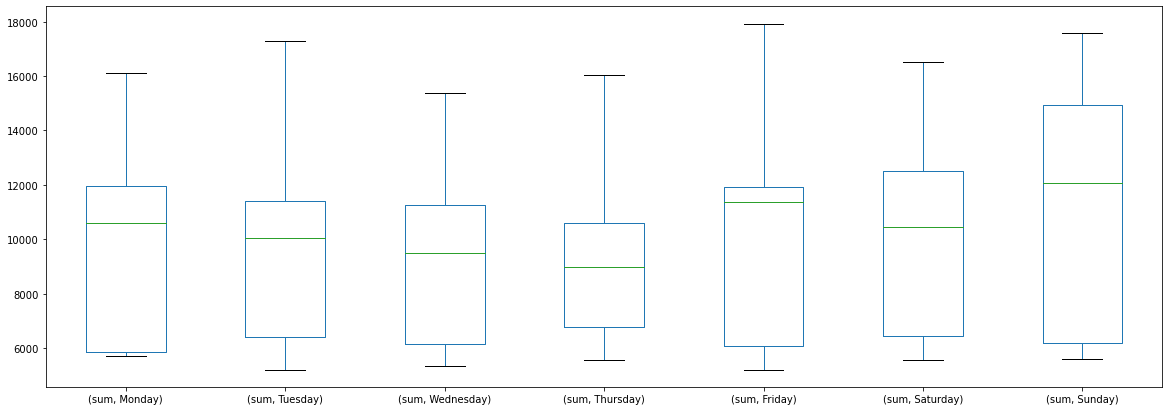

In [19]:
table.plot.box(figsize=(20, 7))

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [21]:
df = pd.read_csv("/Users/Joshitha/Downloads/energydata_complete.csv")

In [22]:
data=df[['date','Appliances']]
data.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [23]:
df.Timestamp = pd.to_datetime(df.date)

df.index = df.Timestamp
df = df.resample('D').mean()

df_month = df.resample('M').mean()
df.head(

SyntaxError: unexpected EOF while parsing (<ipython-input-23-318f27b1fba2>, line 7)

In [171]:
data['date'] = pd.to_datetime(data['date']).dt.date
data.head()

,date,Appliances
0,2016-01-11,60
1,2016-01-11,60
2,2016-01-11,50
3,2016-01-11,50
4,2016-01-11,60


In [177]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(data.date, model='additive')
fig = decomposition.plot()
plt.show()

AttributeError: module 'statsmodels.tsa' has no attribute 'seasonal_decompose'

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df.Timestamp, model='additive')
fig = decomposition.plot()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Timestamp'

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(data.date, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: could not convert string to float: '2016-01-11 17:00:00'

In [28]:
data['20016':'2014'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.show()

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [20016] of <class 'str'>

In [29]:
df['20014':'2016'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.show()

DateParseError: year 20014 is out of range

In [30]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11,136.666667,30.000000,20.808571,46.906210,20.153333,44.793175,20.140972,45.992440,19.492222,47.260813,...,16.918175,45.106210,5.922619,735.173810,89.285714,6.083333,40.845238,4.228571,26.248800,26.248800
2016-01-12,85.694444,4.236111,20.092326,45.142014,19.307655,43.779733,19.993646,44.933171,19.772778,44.556840,...,17.032847,45.680127,5.566319,742.628125,87.500000,5.784722,37.229167,3.596528,25.505072,25.505072
2016-01-13,97.013889,5.416667,19.197824,42.867772,18.568513,42.119669,19.609213,43.720891,19.009803,42.315174,...,16.953576,44.691476,4.856944,754.790625,83.406250,5.614583,31.559028,2.169792,23.464726,23.464726
2016-01-14,151.388889,5.000000,20.372078,42.435191,19.743131,40.699172,20.837581,43.399740,18.694271,43.231053,...,16.884815,45.428229,3.431944,749.767361,86.420139,6.277778,35.149306,1.316667,25.264569,25.264569
2016-01-15,125.347222,5.972222,22.280949,39.099294,21.528172,38.193897,20.959074,41.409884,19.615127,41.961036,...,17.345694,44.534329,2.665278,754.579861,88.385417,7.770833,40.208333,0.849653,26.289515,26.289515


In [31]:
data.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [32]:
data.head(20)

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60
5,2016-01-11 17:50:00,50
6,2016-01-11 18:00:00,60
7,2016-01-11 18:10:00,60
8,2016-01-11 18:20:00,60
9,2016-01-11 18:30:00,70


ValueError: zero-size array to reduction operation fmin which has no identity

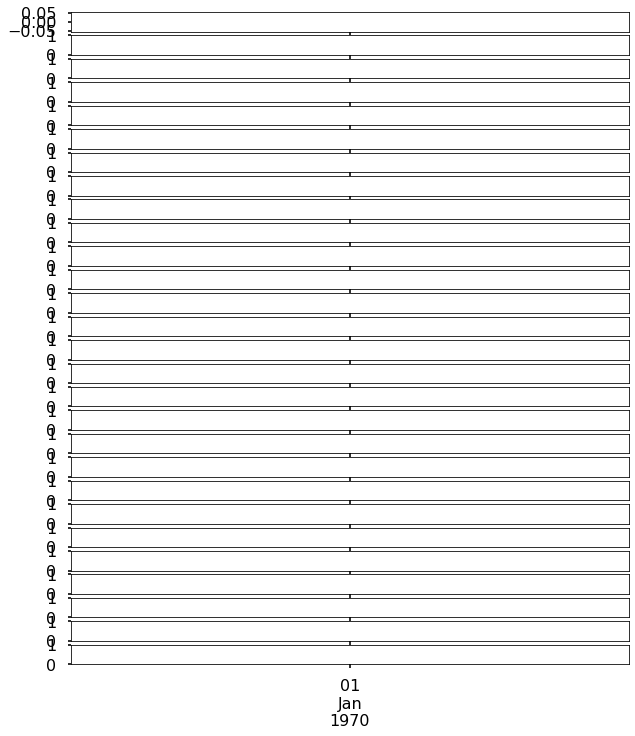

In [34]:
df['5/27/2016':'2/21/2016'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.show()

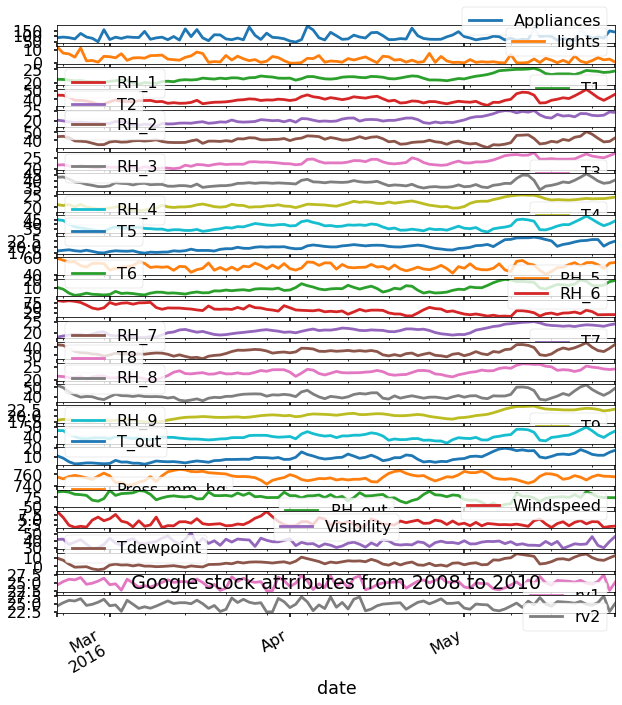

In [35]:
df['2/21/2016':'5/27/2016'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.show()

In [36]:
data['2/21/2016':'5/27/2016'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.show()

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2/21/2016] of <class 'str'>

In [37]:
data.date['2/21/2016':'5/27/2016'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.show()

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2/21/2016] of <class 'str'>

In [38]:
data = pd.read_csv("/Users/Joshitha/Downloads/energydata_complete.csv")

In [39]:
data.High.plot()
plt.legend(['Appliances'])
plt.show()

AttributeError: 'DataFrame' object has no attribute 'High'

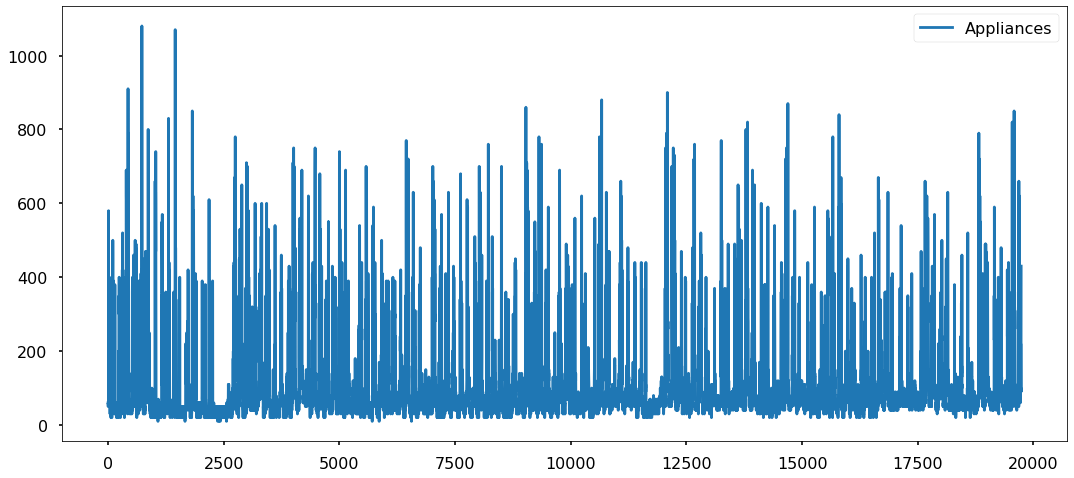

In [40]:
data.Appliances.plot()
plt.legend(['Appliances'])
plt.show()

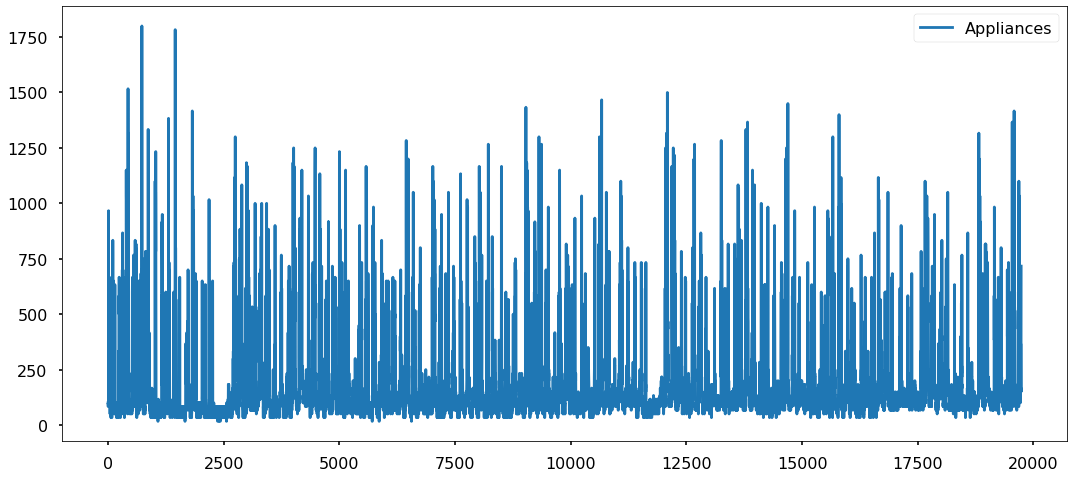

In [41]:
normalized_appliances = data.Appliances.div(data.Appliances.iloc[0]).mul(100)
normalized_appliances.plot()
plt.legend(['Appliances'])
plt.show()

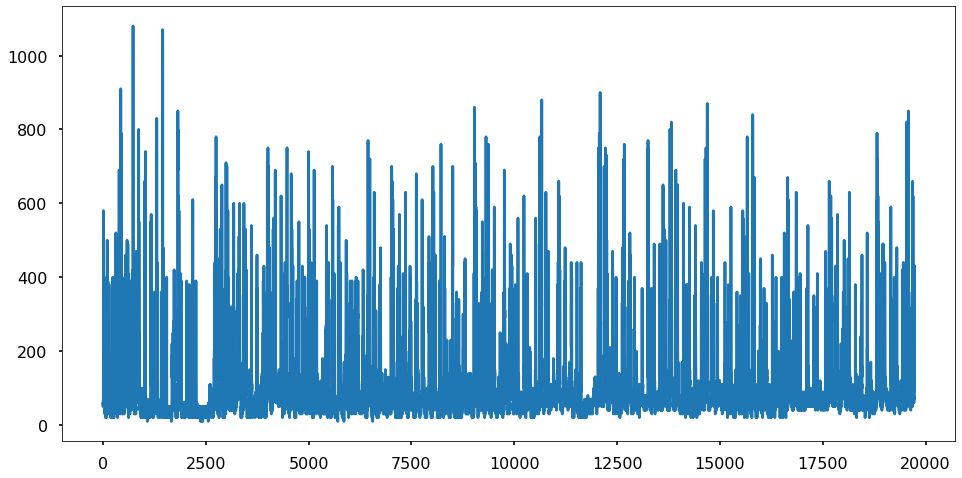

In [42]:
data["Appliances"].plot(figsize=(16,8))

In [179]:
rcParams['figure.figsize'] = 18, 8
decomp = sm.tsa.seasonal_decompose(data["date"],freq=360)
decomp.plot()
plt.show()

AttributeError: module 'statsmodels.tsa' has no attribute 'seasonal_decompose'

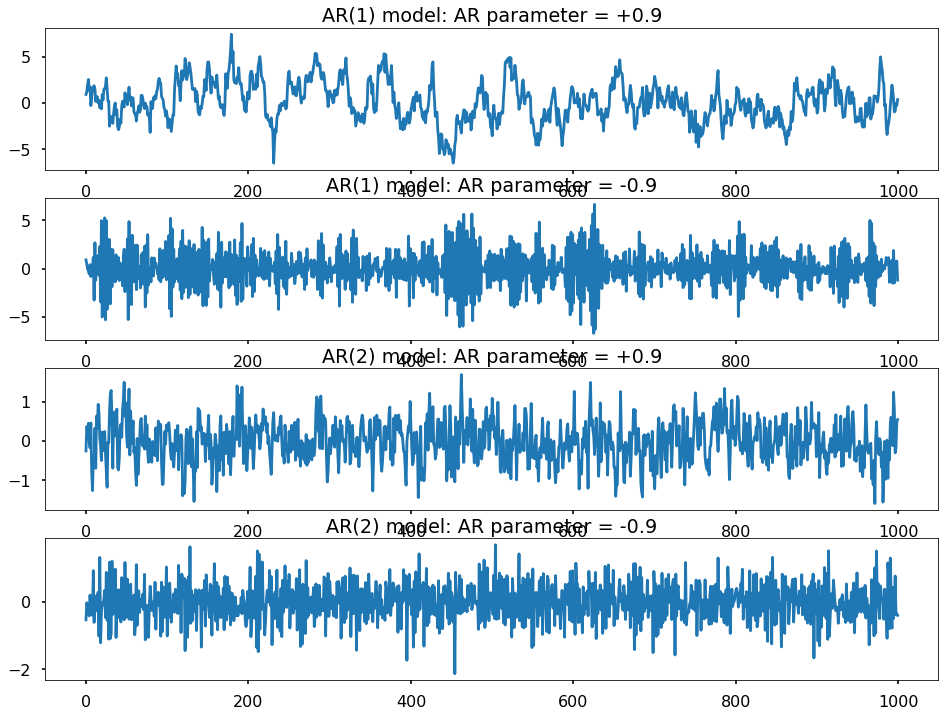

In [46]:
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

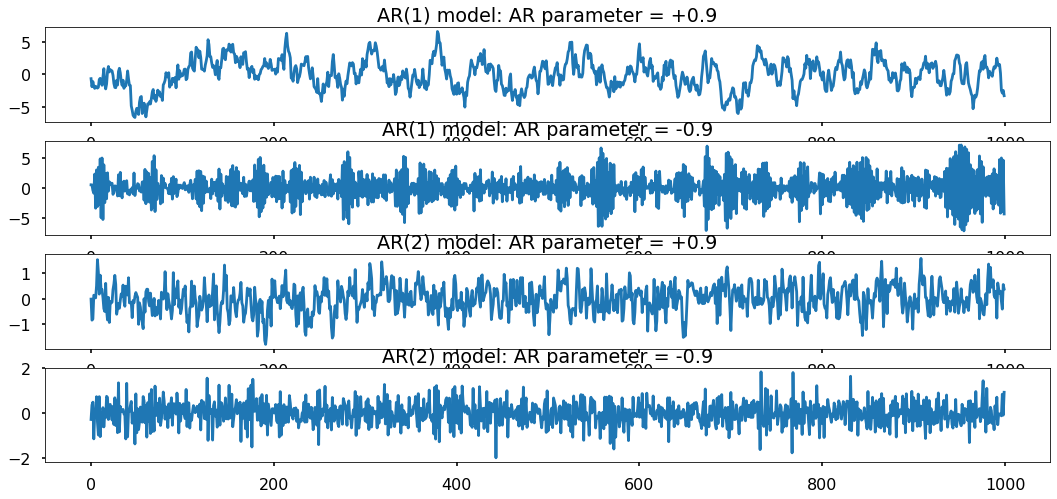

In [47]:
rcParams['figure.figsize'] = 18, 8
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

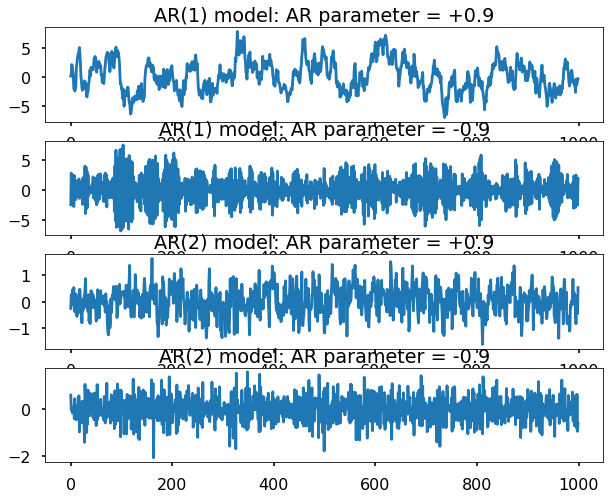

In [48]:
rcParams['figure.figsize'] = 10, 8
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

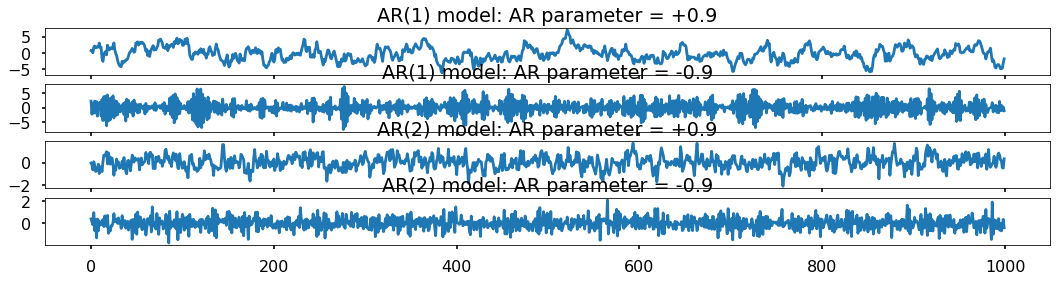

In [49]:
rcParams['figure.figsize'] = 18, 4
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

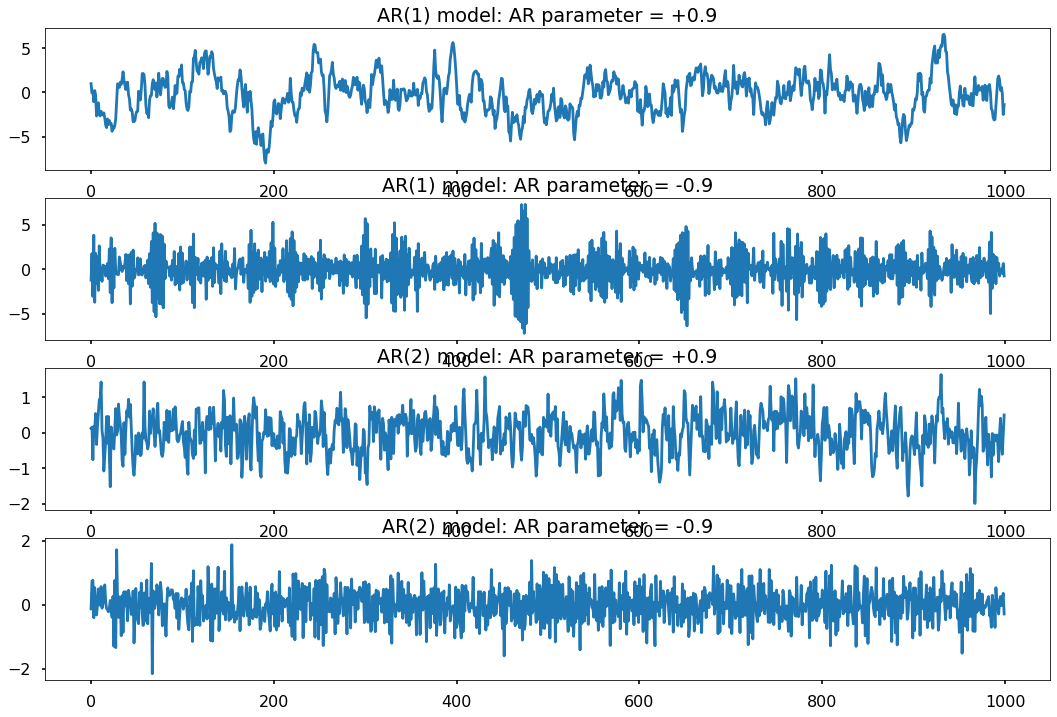

In [50]:
rcParams['figure.figsize'] = 18, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

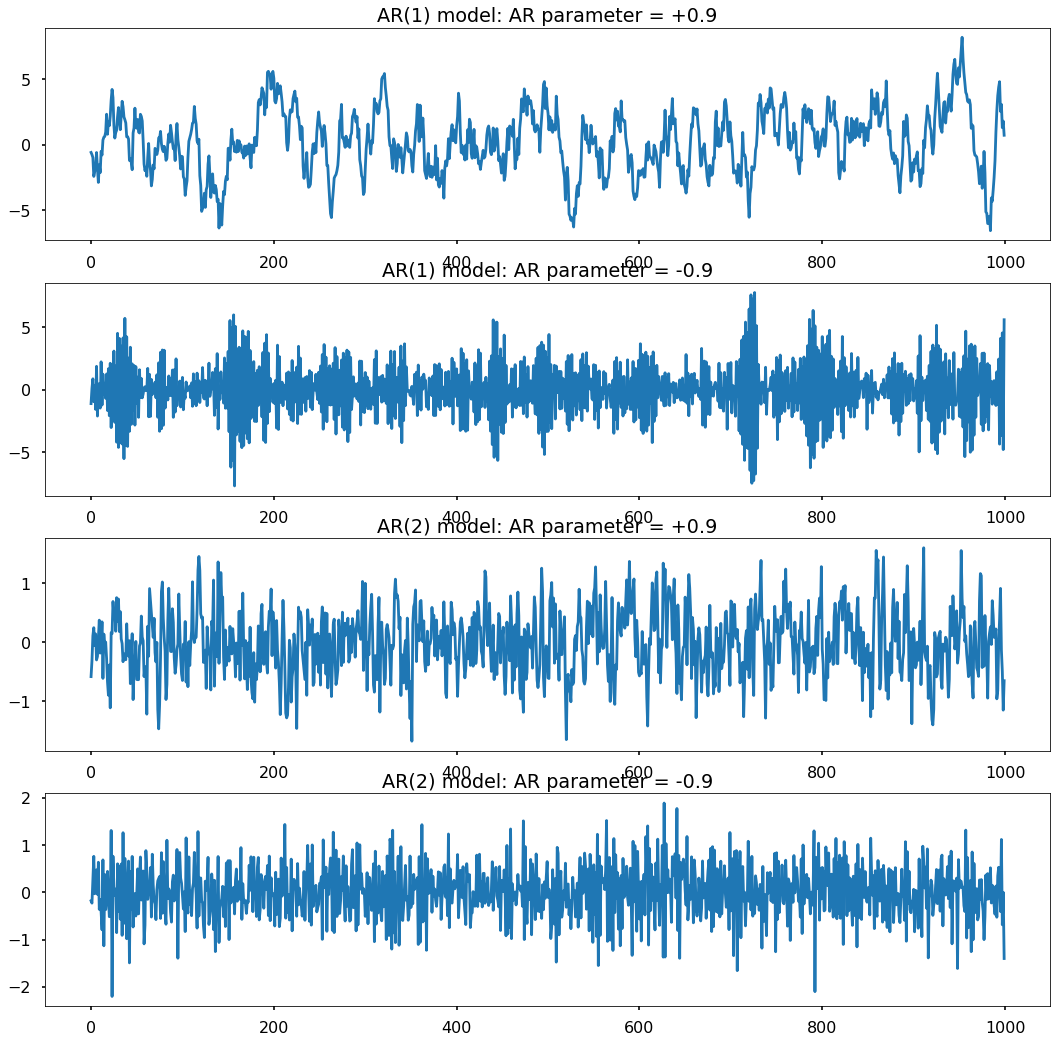

In [51]:
rcParams['figure.figsize'] = 18, 18
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

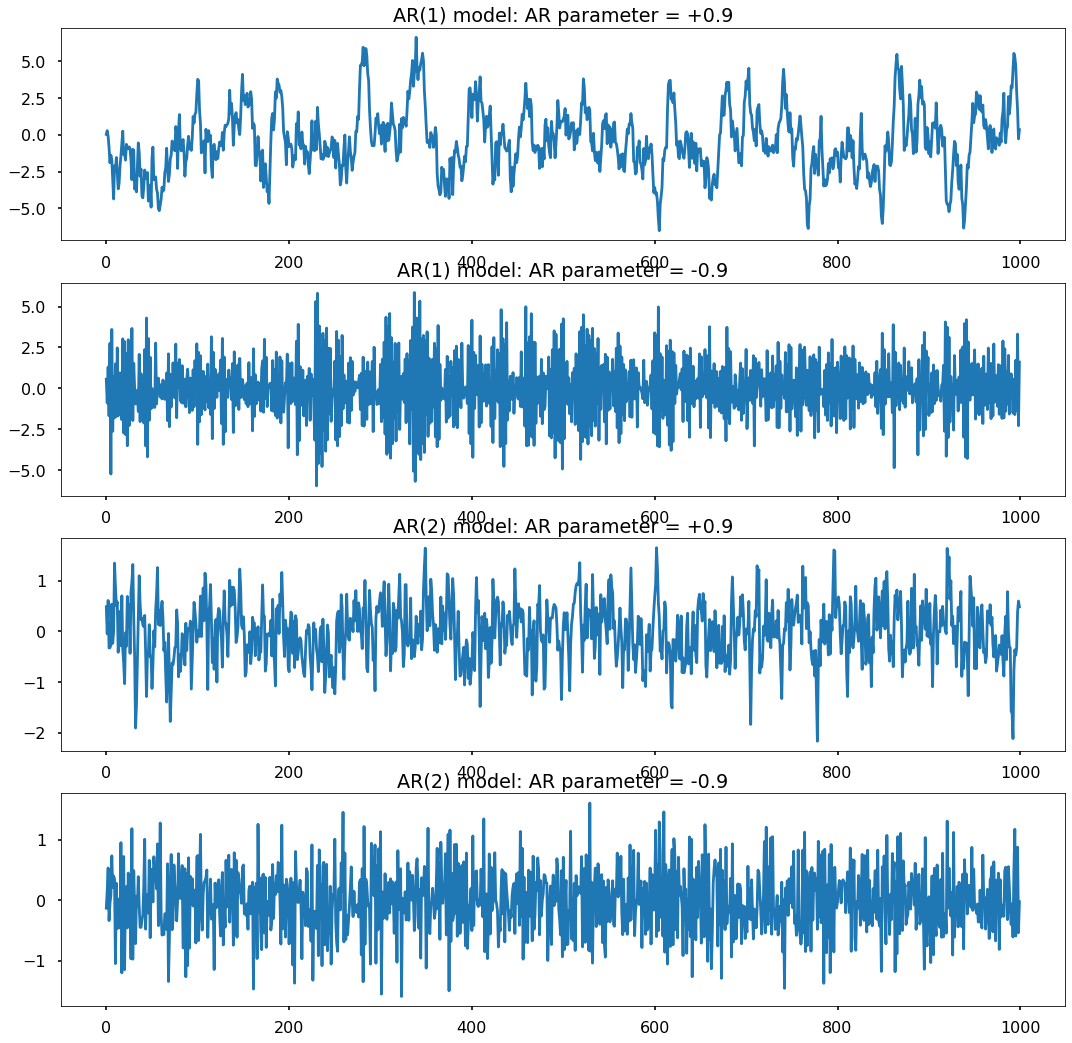

In [52]:
rcParams['figure.figsize'] = 18, 18
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

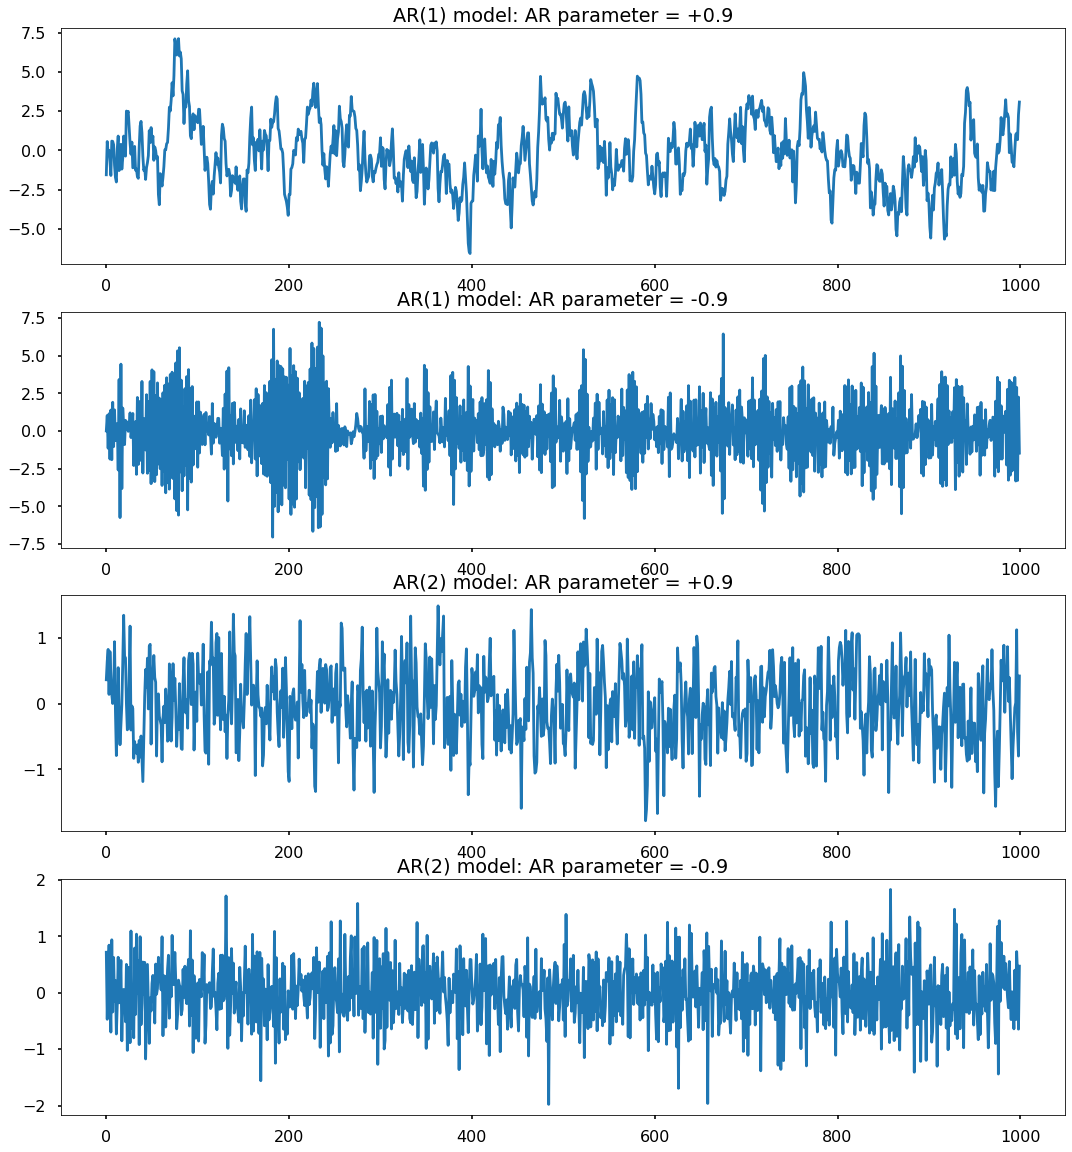

In [53]:
rcParams['figure.figsize'] = 18, 20
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

In [54]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

NameError: name 'ARMA' is not defined

In [55]:
from statsmodels.tsa.arma_model import ARMA
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

ModuleNotFoundError: No module named 'statsmodels.tsa.arma_model'

In [56]:
import statsmodels.tsa.api as tsa
model = tsa.ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1397.316
Method:                       css-mle   S.D. of innovations              0.978
Date:                Sat, 15 May 2021   AIC                           2800.632
Time:                        01:22:34   BIC                           2815.356
Sample:                             0   HQIC                          2806.228
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1766      0.262     -0.674      0.501      -0.690       0.337
ar.L1.y        0.8829      0.015     59.526      0.000       0.854       0.912
                                    Roots           

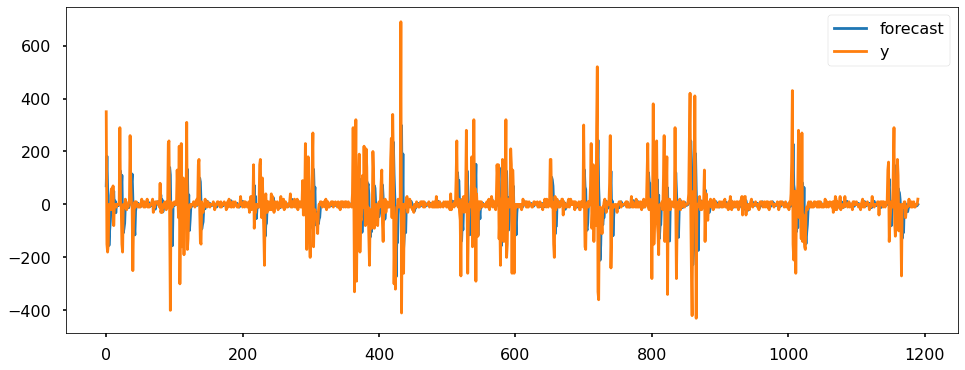

In [117]:
result.plot_predict(start=10, end=1200)
plt.rcParams["figure.figsize"] = (16, 6)
plt.show()

In [89]:
rmse = math.sqrt(mean_squared_error(sim1[10:1200], result.predict(start=10,end=1200)))
print("The root mean squared error is {}.".format(rmse))

NameError: name 'math' is not defined

In [90]:
import math
rmse = math.sqrt(mean_squared_error(sim1[10:1200], result.predict(start=10,end=1200)))
print("The root mean squared error is {}.".format(rmse))

NameError: name 'mean_squared_error' is not defined

In [91]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(sim1[10:1200], result.predict(start=10,end=1200)))
print("The root mean squared error is {}.".format(rmse))

ValueError: Found input variables with inconsistent numbers of samples: [990, 1191]

In [92]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(sim1[990:1191], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

ValueError: Found input variables with inconsistent numbers of samples: [10, 100]

In [93]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(sim1[10:1191], result.predict(start=10,end=1191)))
print("The root mean squared error is {}.".format(rmse))

ValueError: Found input variables with inconsistent numbers of samples: [990, 1182]

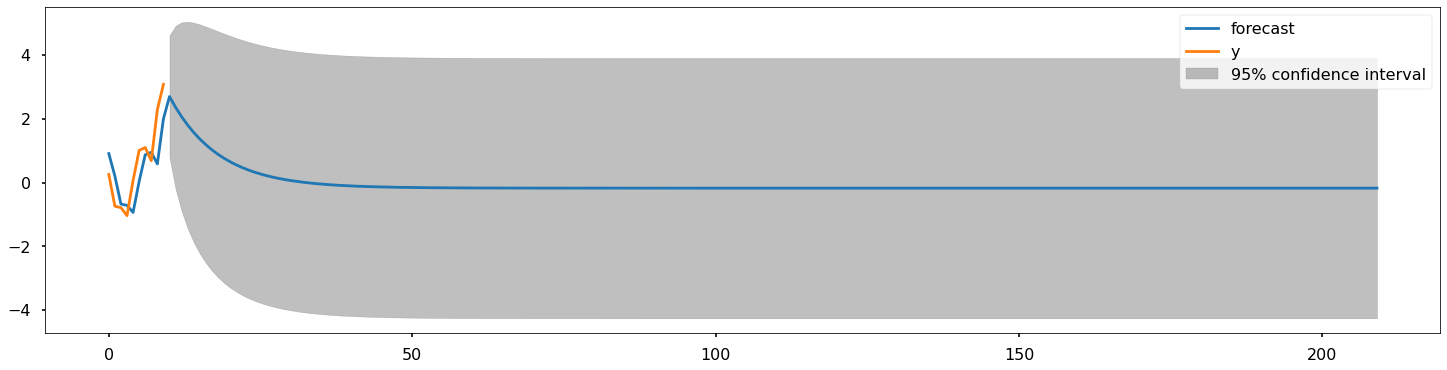

In [94]:
result.plot_predict(start=990, end=1199)
plt.rcParams["figure.figsize"] = (25,6)
plt.show()

In [95]:
rmse = math.sqrt(mean_squared_error(sim1[10:1191], result.predict(start=10,end=1191)))
print("The root mean squared error is {}.".format(rmse))

ValueError: Found input variables with inconsistent numbers of samples: [990, 1182]

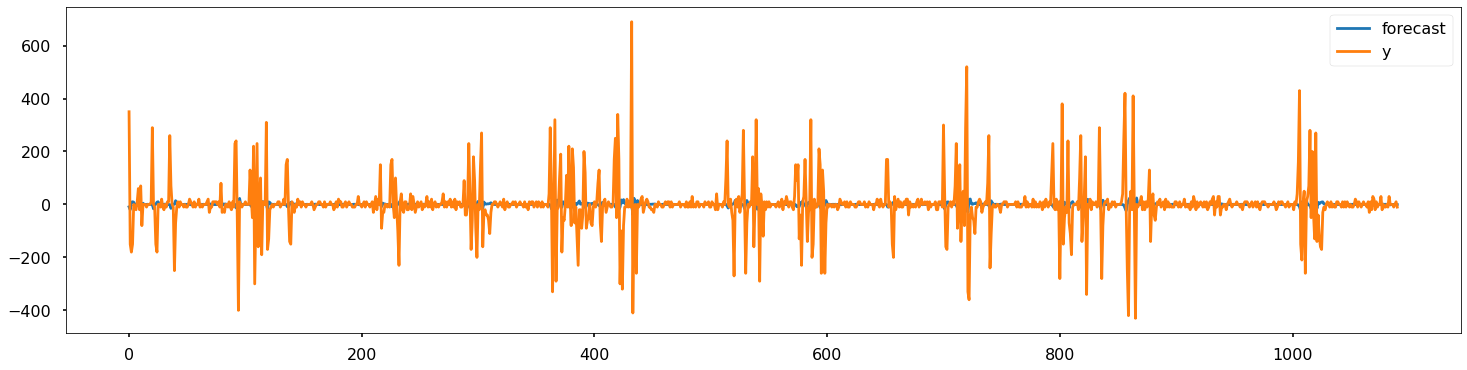

In [96]:
App = tsa.ARMA(data["Appliances"].diff().iloc[1:].values, order=(1,0))
res = App.fit()
res.plot_predict(start=10, end=1100)
plt.show()

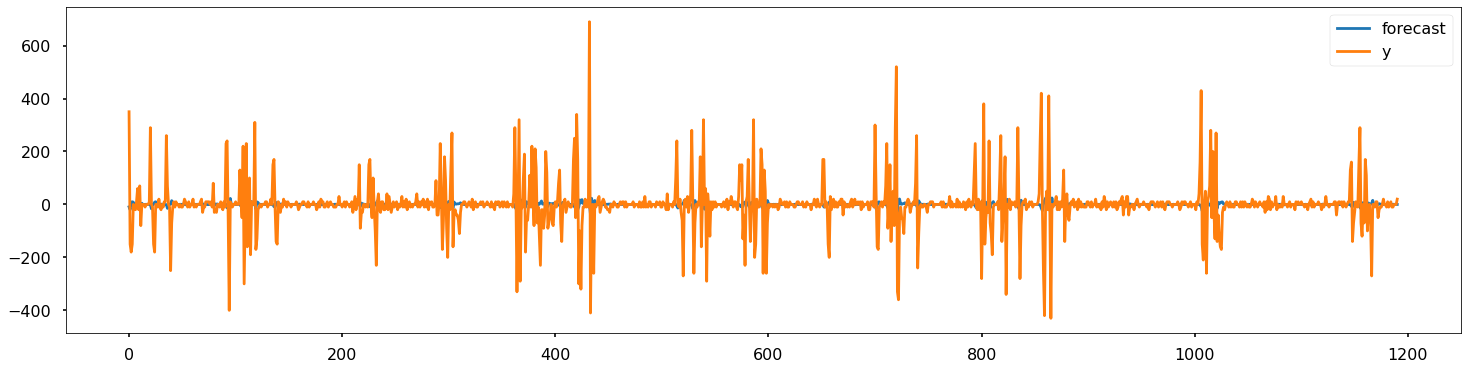

In [97]:
App = tsa.ARMA(data["Appliances"].diff().iloc[1:].values, order=(1,0))
res = App.fit()
res.plot_predict(start=10, end=1200)
plt.show()

In [100]:
rmse = math.sqrt(mean_squared_error(data["Appliances"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 13.114125543502386.


In [101]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0107435077807447.


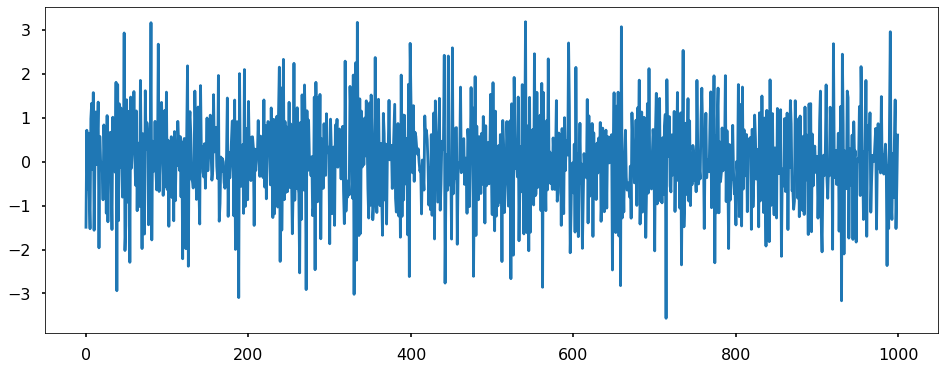

In [102]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

In [103]:
model = tsa.ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1387.160
Method:                       css-mle   S.D. of innovations              0.969
Date:                Sat, 15 May 2021   AIC                           2780.320
Time:                        01:44:50   BIC                           2795.043
Sample:                             0   HQIC                          2785.915
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0166      0.015      1.085      0.278      -0.013       0.047
ma.L1.y       -0.5010      0.028    -17.938      0.000      -0.556      -0.446
                                    Roots           

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                19734
Model:                     ARMA(0, 3)   Log Likelihood             -110889.198
Method:                       css-mle   S.D. of innovations             66.702
Date:                Sat, 15 May 2021   AIC                         221788.397
Time:                        01:49:00   BIC                         221827.847
Sample:                             0   HQIC                        221801.312
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0069      0.125      0.056      0.956      -0.237       0.251
ma.L1.y       -0.1949      0.007    -28.119      0.000      -0.208      -0.181
ma.L2.y       -0.3713      0.007    -52.526      0.0

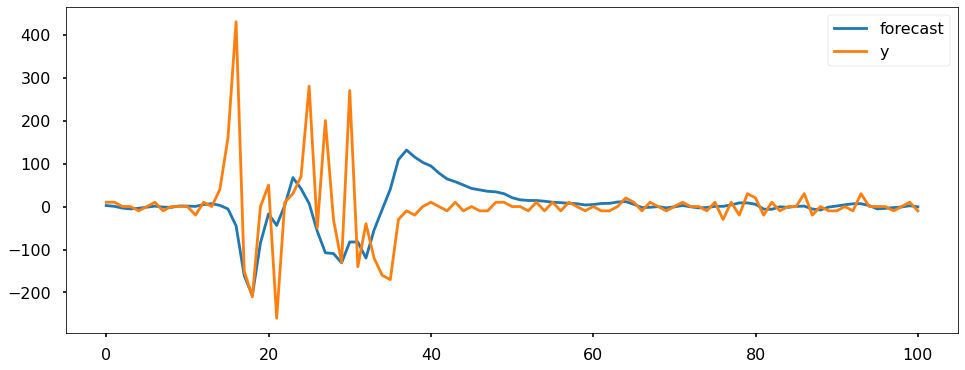

In [111]:
model = tsa.ARMA(data["Appliances"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [112]:
rmse = math.sqrt(mean_squared_error(data["Appliances"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 103.3764777824274.


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                19734
Model:                     ARMA(3, 3)   Log Likelihood             -110820.335
Method:                       css-mle   S.D. of innovations             66.470
Date:                Sat, 15 May 2021   AIC                         221656.670
Time:                        01:51:55   BIC                         221719.791
Sample:                             0   HQIC                        221677.335
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0051      0.096      0.053      0.957      -0.182       0.193
ar.L1.y        0.7122      0.162      4.396      0.000       0.395       1.030
ar.L2.y       -0.1991      0.089     -2.237      0.0

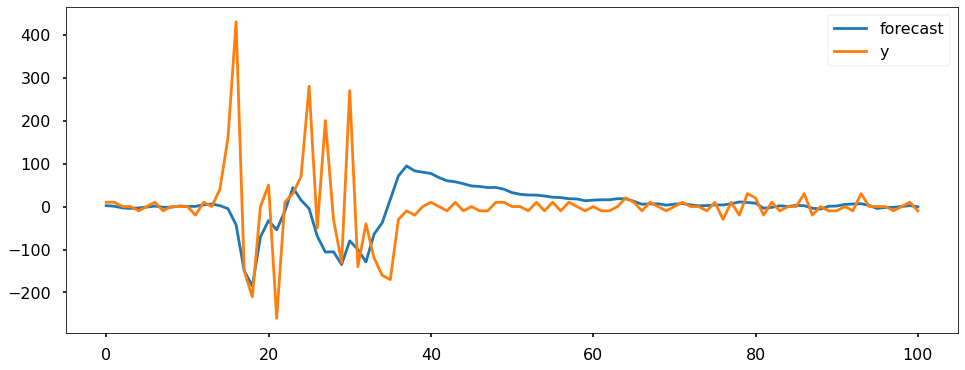

In [113]:
model = tsa.ARMA(data["Appliances"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [114]:
rmse = math.sqrt(mean_squared_error(data["Appliances"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 100.90138434201505.


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                19733
Model:                 ARIMA(2, 1, 0)   Log Likelihood             -116305.226
Method:                       css-mle   S.D. of innovations             87.794
Date:                Sat, 15 May 2021   AIC                         232618.452
Time:                        01:53:54   BIC                         232650.013
Sample:                             1   HQIC                        232628.785
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.318      0.014      0.989      -0.619       0.628
ar.L1.D.y     -0.5710      0.007    -87.279      0.000      -0.584      -0.558
ar.L2.D.y     -0.3941      0.007    -60.240      0.0

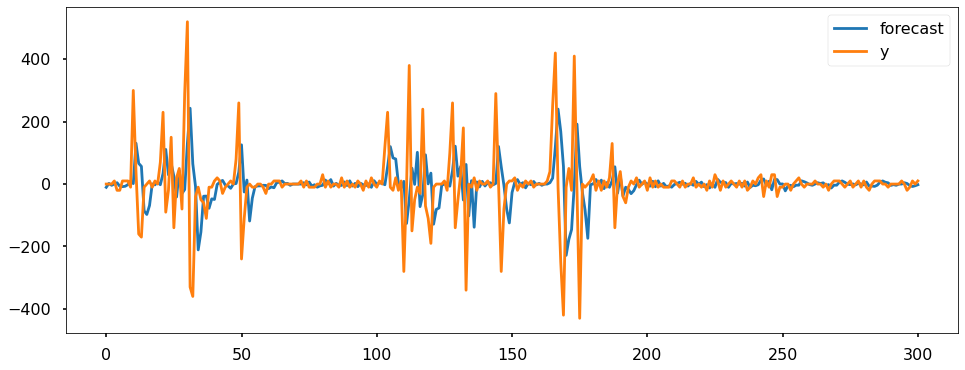

In [115]:
rcParams['figure.figsize'] = 16, 6
model = tsa.ARIMA(data["Appliances"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [116]:
rmse = math.sqrt(mean_squared_error(data["Appliances"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 167.53772311555153.


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                19734
Model:               SARIMAX(4, 0, 4)   Log Likelihood             -110791.241
Date:                Sat, 15 May 2021   AIC                         221602.482
Time:                        02:09:56   BIC                         221681.383
Sample:                             0   HQIC                        221628.312
                              - 19734                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0014      0.118      0.012      0.990      -0.229       0.232
ar.L1          0.8592      0.076     11.292      0.000       0.710       1.008
ar.L2         -0.8709      0.085    -10.211      0.0

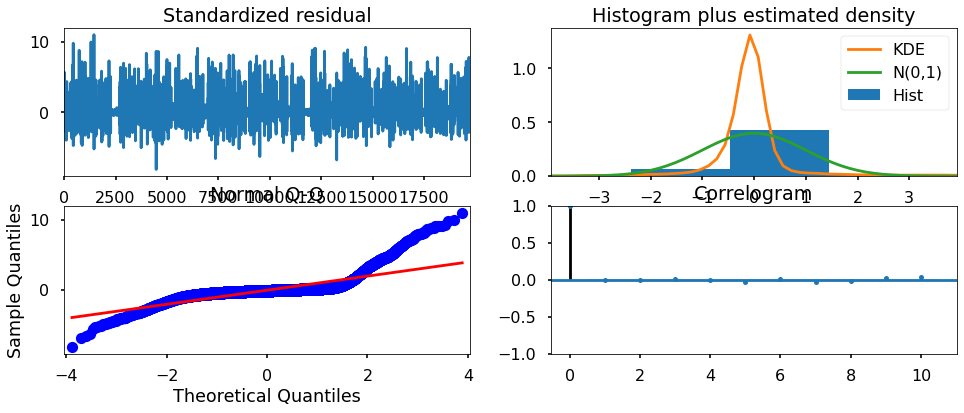

In [120]:
train_sample = data["Appliances"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

In [121]:
import pickle
import warnings

import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt

from utils.plots import bar_metrics


# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = 18, 8

with open('results/scores.pickle', 'rb') as handle:
    resultsDict = pickle.load(handle)

# Load our results from the model notebook
with open('results/predictions.pickle', 'rb') as handle:
    predictionsDict = pickle.load(handle)

ModuleNotFoundError: No module named 'utils'

In [122]:
bar_metrics(resultsDict)

NameError: name 'bar_metrics' is not defined

In [123]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
decomposed_appliances_volume = sm.tsa.seasonal_decompose(data["Appliances"],freq=360)
series = decomposed_appliances_volume[:365]
result = seasonal_decompose(series, model='multiplicative')
result.plot()

TypeError: 'DecomposeResult' object is not subscriptable

<Figure size 4000x1600 with 0 Axes>

In [136]:
import warnings

import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import numpy as np
from pandas.core.nanops import nanmean as pd_nanmean
from statsmodels.tsa.tsatools import freq_to_period

In [137]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
decomposed_appliances_volume = sm.tsa.seasonal_decompose(data["Appliances"],freq=360)
series = decomposed_appliances_volume[:365]
result = tsa.seasonal.seasonal_decompose(series, model='multiplicative')
result.plot()

AttributeError: module 'statsmodels.tsa' has no attribute 'seasonal_decompose'

<Figure size 4000x1600 with 0 Axes>

In [138]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
decomposed_appliances_volume = sm.tsa.seasonal_decompose(data["date"],freq=360)
series = decomposed_appliances_volume[:365]
result = tsa.seasonal.seasonal_decompose(series, model='multiplicative')
result.plot()

AttributeError: module 'statsmodels.tsa' has no attribute 'seasonal_decompose'

<Figure size 4000x1600 with 0 Axes>

In [143]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = decomposed_appliances_volume[:365]
result = seasonal_decompose(series, model='multiplicative')
result.plot()

TypeError: 'DecomposeResult' object is not subscriptable

<Figure size 4000x1600 with 0 Axes>

In [142]:
df["date"].plot(figsize=(16,8))

KeyError: 'date'

In [148]:
decomposed_appliances_volume = sm.tsa.seasonal_decompose(data[0])

AttributeError: module 'statsmodels.tsa' has no attribute 'seasonal_decompose'

In [149]:
data = pd.read_csv("/Users/Joshitha/Downloads/energydata_complete.csv")

In [150]:
decomposed_appliances_volume = sm.tsa.seasonal_decompose(data[1])

AttributeError: module 'statsmodels.tsa' has no attribute 'seasonal_decompose'

In [156]:
decomposed_appliances_volume = seasonal_decompose(data["date"])

KeyError: 'date'

In [152]:
data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [155]:
data.set_index('date', inplace=True)
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [157]:
rcParams['figure.figsize'] = 18, 8
decomposed_appliances_volume = sm.tsa.seasonal_decompose(data["Appliances"],freq=360) # The frequncy is annual
figure = decomposed_appliances_volume.plot(model='multiplicative')
plt.show()

AttributeError: module 'statsmodels.tsa' has no attribute 'seasonal_decompose'

In [158]:
data=df[['date','Appliances']]
data.head()

KeyError: "['date'] not in index"

In [161]:
df = pd.read_csv("/Users/Joshitha/Downloads/energydata_complete.csv")

In [162]:
data=df[['date','Appliances']]
data.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [163]:
df.Timestamp = pd.to_datetime(df.date)

df.index = df.Timestamp
df = df.resample('D').mean()

df_month = df.resample('M').mean()
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11,136.666667,30.000000,20.808571,46.906210,20.153333,44.793175,20.140972,45.992440,19.492222,47.260813,...,16.918175,45.106210,5.922619,735.173810,89.285714,6.083333,40.845238,4.228571,26.248800,26.248800
2016-01-12,85.694444,4.236111,20.092326,45.142014,19.307655,43.779733,19.993646,44.933171,19.772778,44.556840,...,17.032847,45.680127,5.566319,742.628125,87.500000,5.784722,37.229167,3.596528,25.505072,25.505072
2016-01-13,97.013889,5.416667,19.197824,42.867772,18.568513,42.119669,19.609213,43.720891,19.009803,42.315174,...,16.953576,44.691476,4.856944,754.790625,83.406250,5.614583,31.559028,2.169792,23.464726,23.464726
2016-01-14,151.388889,5.000000,20.372078,42.435191,19.743131,40.699172,20.837581,43.399740,18.694271,43.231053,...,16.884815,45.428229,3.431944,749.767361,86.420139,6.277778,35.149306,1.316667,25.264569,25.264569
2016-01-15,125.347222,5.972222,22.280949,39.099294,21.528172,38.193897,20.959074,41.409884,19.615127,41.961036,...,17.345694,44.534329,2.665278,754.579861,88.385417,7.770833,40.208333,0.849653,26.289515,26.289515


In [180]:
rcParams['figure.figsize'] = 18, 8
decomposed_appliances_volume = sm.tsa.seasonal_decompose(df["date"],freq=365) # The frequncy is annual
figure = decomposed_appliances_volume.plot(model='multiplicative')
plt.show()

AttributeError: module 'statsmodels.tsa' has no attribute 'seasonal_decompose'

In [181]:
rcParams['figure.figsize'] = 18, 8
decomposed_appliances_volume = sm.tsa.seasonal_decompose(df[0],freq=360) # The frequncy is annual
figure = decomposed_appliances_volume.plot(model='additive')
plt.show()

AttributeError: module 'statsmodels.tsa' has no attribute 'seasonal_decompose'

In [168]:
data=df[0]
data.head(1)

KeyError: 0

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [183]:
df = pd.read_csv("/Users/Joshitha/Downloads/energydata_complete.csv")

In [184]:
data=df[['date','Appliances']]
data.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [185]:
df.Timestamp = pd.to_datetime(df.date)

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11,136.666667,30.000000,20.808571,46.906210,20.153333,44.793175,20.140972,45.992440,19.492222,47.260813,...,16.918175,45.106210,5.922619,735.173810,89.285714,6.083333,40.845238,4.228571,26.248800,26.248800
2016-01-12,85.694444,4.236111,20.092326,45.142014,19.307655,43.779733,19.993646,44.933171,19.772778,44.556840,...,17.032847,45.680127,5.566319,742.628125,87.500000,5.784722,37.229167,3.596528,25.505072,25.505072
2016-01-13,97.013889,5.416667,19.197824,42.867772,18.568513,42.119669,19.609213,43.720891,19.009803,42.315174,...,16.953576,44.691476,4.856944,754.790625,83.406250,5.614583,31.559028,2.169792,23.464726,23.464726
2016-01-14,151.388889,5.000000,20.372078,42.435191,19.743131,40.699172,20.837581,43.399740,18.694271,43.231053,...,16.884815,45.428229,3.431944,749.767361,86.420139,6.277778,35.149306,1.316667,25.264569,25.264569
2016-01-15,125.347222,5.972222,22.280949,39.099294,21.528172,38.193897,20.959074,41.409884,19.615127,41.961036,...,17.345694,44.534329,2.665278,754.579861,88.385417,7.770833,40.208333,0.849653,26.289515,26.289515


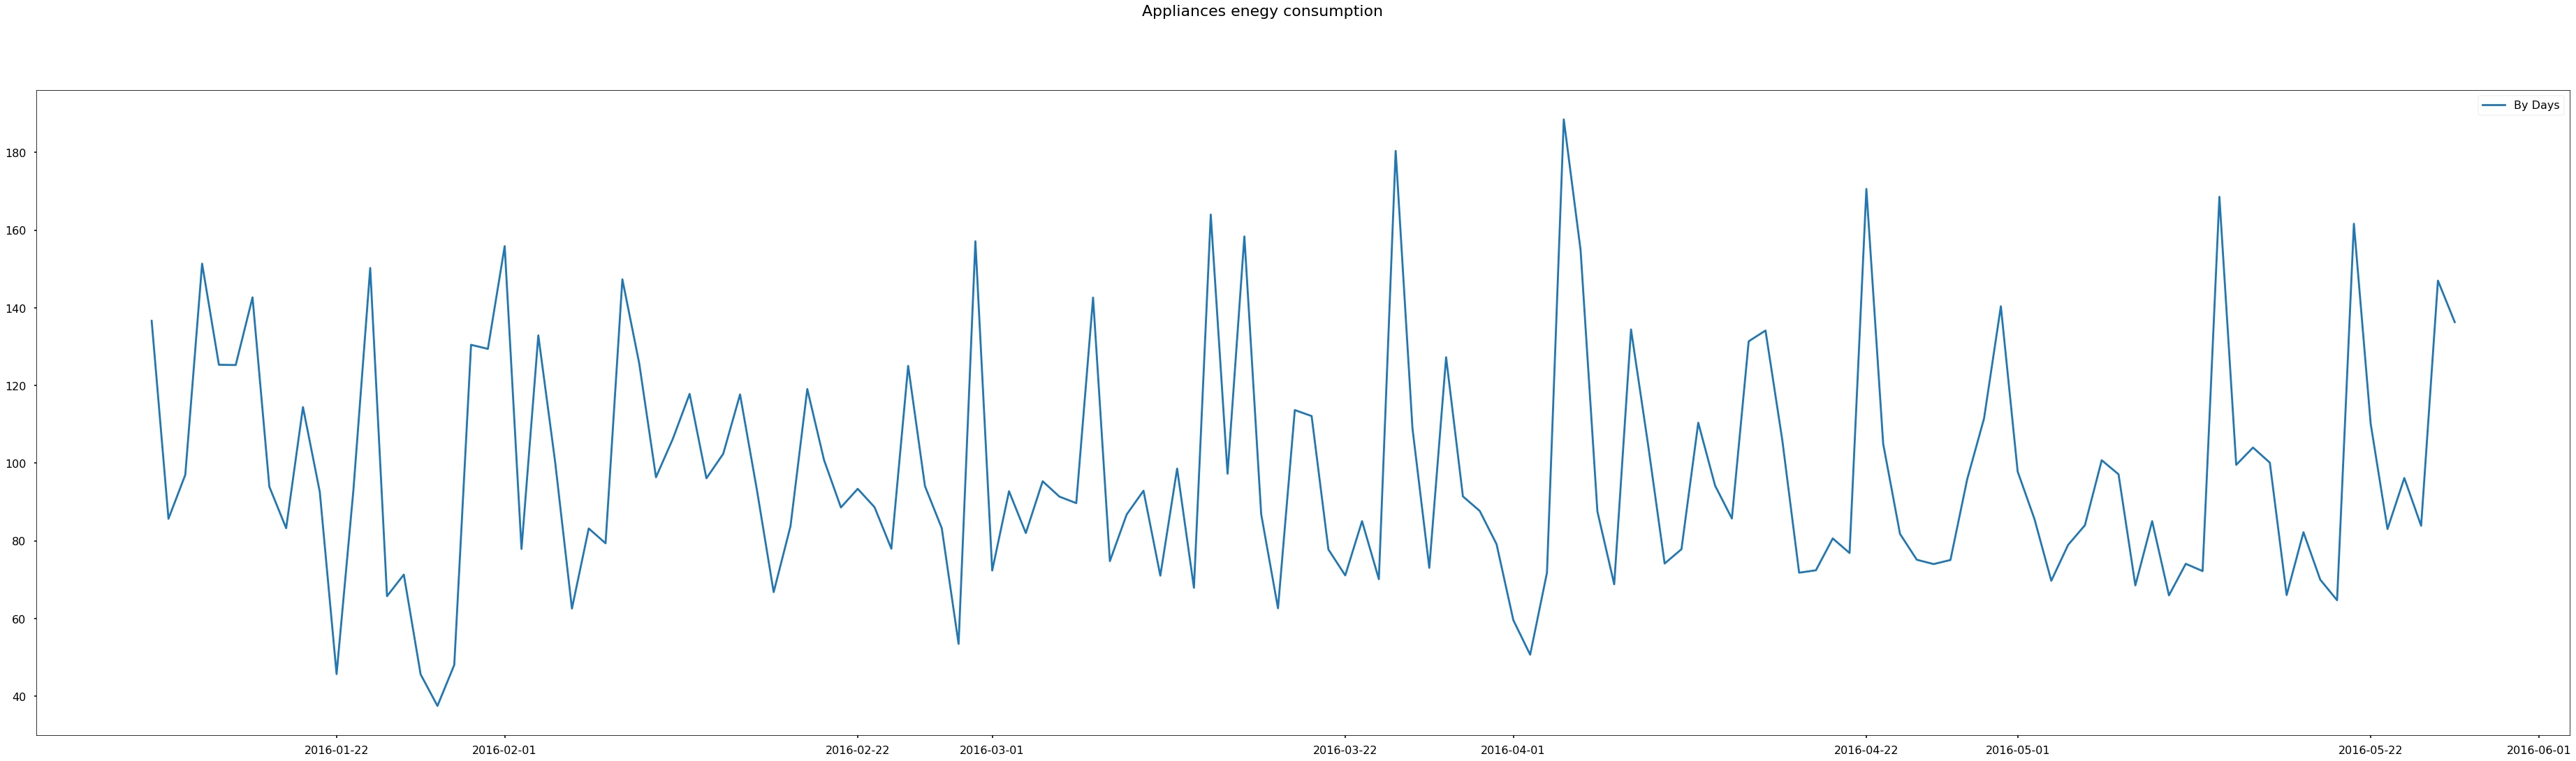

In [186]:
fig = plt.figure(figsize=[65, 17])
plt.suptitle('Appliances enegy consumption', fontsize=22)

plt.subplot()
plt.plot(df.Appliances, '-', label='By Days')
plt.legend()

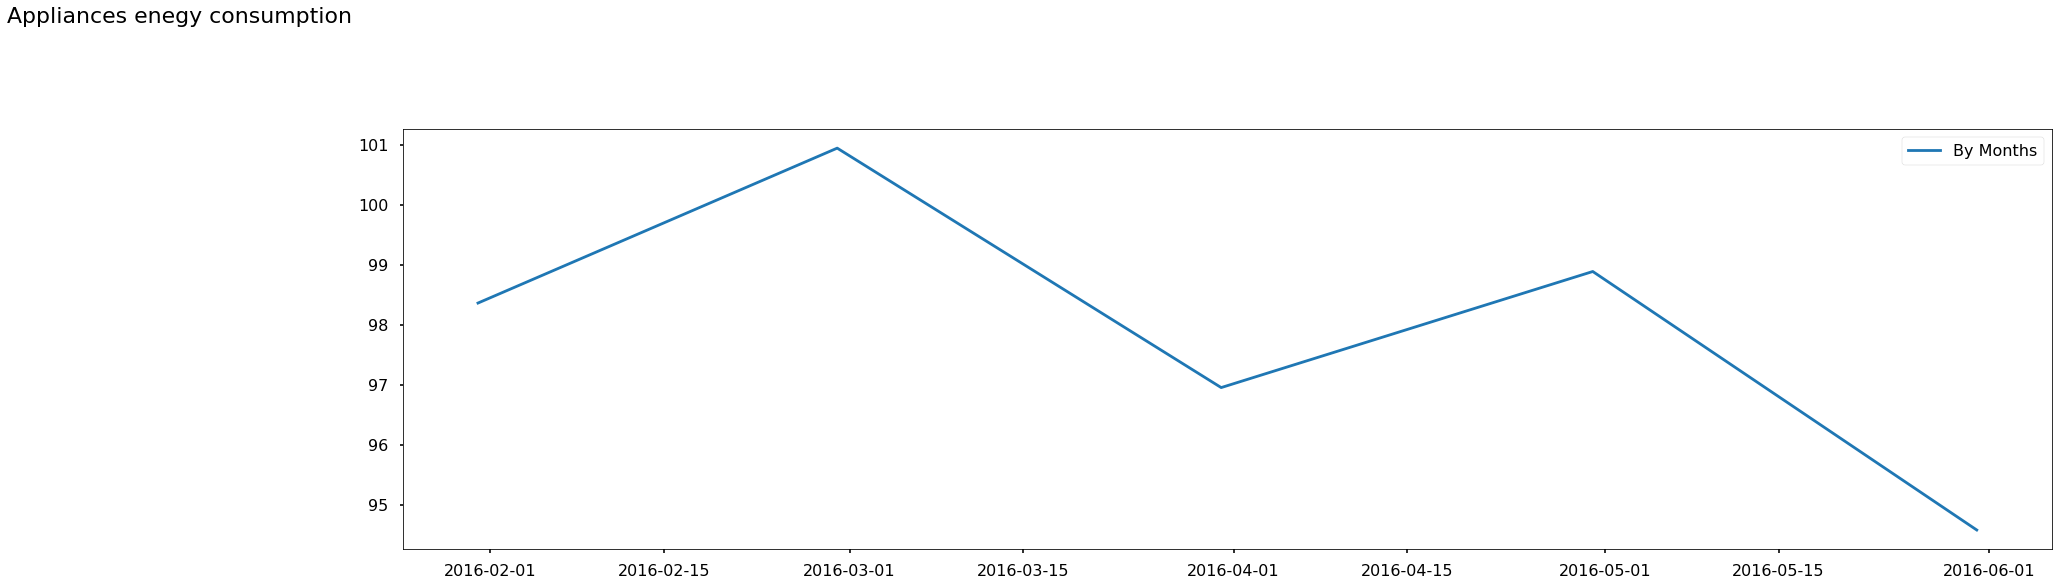

In [190]:
fig = plt.figure(figsize=[65, 17])
plt.suptitle('Appliances enegy consumption', fontsize=22)

plt.subplot()
plt.plot(df.Appliances, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Appliances, '-', label='By Months')
plt.legend()

In [191]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df.Appliances)[1])

Dickey–Fuller test: p=0.000000


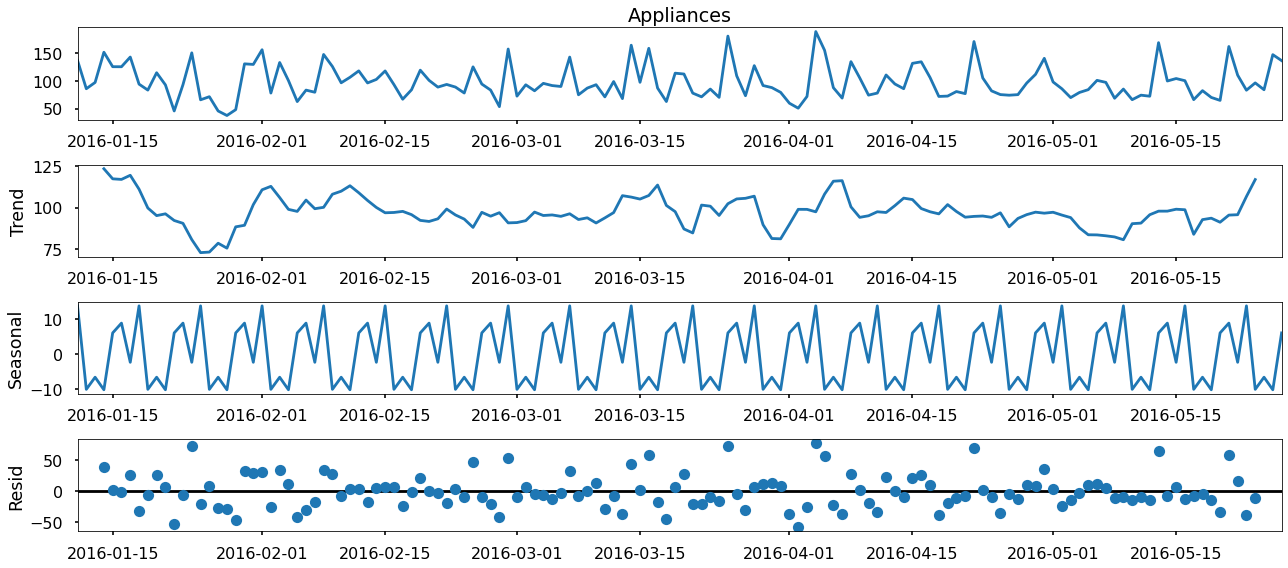

In [192]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df.Appliances, model='additive')
fig = decomposition.plot()
plt.show()

In [224]:
import statsmodels.tsa.api as tsa
model = tsa.ARMA(sim1, order=(1,0))
results = model.fit()
print(results.summary())
print("μ={} ,ϕ={}".format(results.params[0],results.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1412.229
Method:                       css-mle   S.D. of innovations              0.993
Date:                Sat, 15 May 2021   AIC                           2830.457
Time:                        16:29:28   BIC                           2845.181
Sample:                             0   HQIC                          2836.053
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0162      0.023      0.721      0.471      -0.028       0.060
ar.L1.y       -0.3940      0.029    -13.549      0.000      -0.451      -0.337
                                    Roots           

In [216]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [217]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.Appliances,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1658.7532763969257
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1428.6726154060061
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1313.1647659322539
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1106.9819680789724
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1318.1457992688975
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1246.8123895451533
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1152.4882411221831
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1108.9482703667918
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1541.358763115322
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1359.5348550785536
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1300.6379936358474
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1097.6124476713799
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1315.2894811595938
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1237.244715212393
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1154.3111338739288
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1099.5876716944963
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1393.4310643175713
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1273.77788639

In [2]:
import statsmodels.tsa.api as tsa
model = tsa.AR(data.Appliances)
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

NameError: name 'data' is not defined

In [222]:
pred = result.get_prediction(start=pd.to_datetime('2016-04-20'), dynamic=False)
pred_ci = pred.conf_int()

ax = df.Appliances['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Appliances consumption')
plt.legend()

plt.show()

AttributeError: 'ARMAResults' object has no attribute 'get_prediction'

In [207]:
y_forecasted = pred.predicted_mean
y_truth = df.Appliances['2016-04-20':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 906.06


In [208]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 30.1


<function matplotlib.pyplot.show(*args, **kw)>

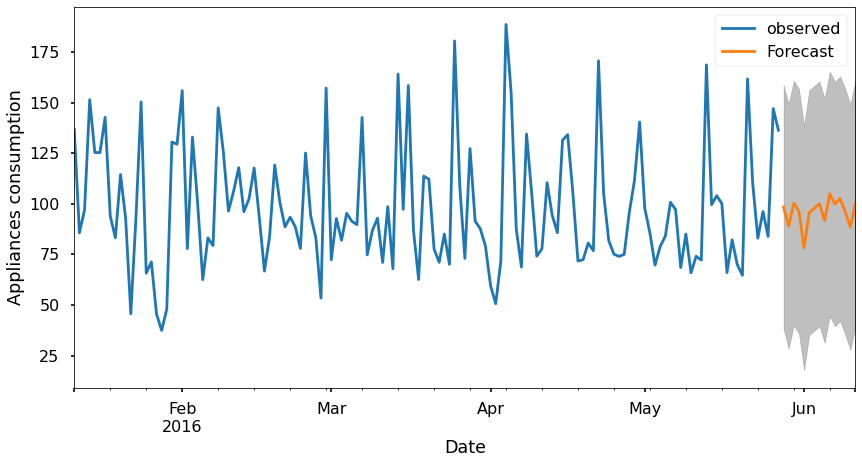

In [209]:
plt.plot(results.values, label='Original')
plt.plot(yhat.values, color='red', label='AR predicted')
plt.legend()

In [210]:
model = tsa.ARMA(df.Appliances, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:             Appliances   No. Observations:                  138
Model:                     ARMA(0, 3)   Log Likelihood                -663.492
Method:                       css-mle   S.D. of innovations             29.620
Date:                Sat, 15 May 2021   AIC                           1336.984
Time:                        14:45:26   BIC                           1351.621
Sample:                    01-11-2016   HQIC                          1342.932
                         - 05-27-2016                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               97.6745      1.852     52.732      0.000      94.044     101.305
ma.L1.Appliances     0.0704      0.087      0.807      0.420      -0.101       0.241
ma.L2.Appliances    -0.1744 

In [223]:
pip install statsmodels --upgrade

     |████████████████████████████████| 17.5 MB 1.7 MB/s eta 0:00:01    |██████████████▊                 | 8.1 MB 1.7 MB/s eta 0:00:06
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.12.2-cp38-cp38-macosx_10_14_x86_64.whl size=9645270 sha256=3c3b81b7b9bcf0b51001be62aa49d3a6e55d6eb96193ef4e9e693eb687c5af98
  Stored in directory: /Users/joshitha/Library/Caches/pip/wheels/7b/bf/91/ed8052c0ed1bce63ab3cfc9ad51218518f41ab34d61f398140
Successfully built statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.11.1
    Uninstalling statsmodels-0.11.1:
      Successfully uninstalled statsmodels-0.11.1
Note: you may need to restart the kernel to use updated packages.
